# Analyzing Data For dashboard

In [1]:
import json
import pandas as pd

In [8]:
# Read data scraped

with open('data/dawson_data.json', 'r') as f:
    data = json.loads(f.read())

In [12]:
#Convert data to dataframe for easier time for stats
df = pd.DataFrame(data)

In [74]:
#Change date to actual Timestamp type
df ['date'] = pd.to_datetime(df['date'])

In [75]:
#First get number of different things offered at Dawson
totalOffered = len(df)
totalOffered

76

In [44]:
# Gets amount of given type
def getNumberOfType(wantedType):
    #Get number of programs
    mask = df['type'] == wantedType
    number = len(df[mask])
    return number

In [48]:
#Main stats of amounts
numberPrograms = getNumberOfType('Program')
numberProfiles = getNumberOfType('Profile')
numberDisciplines = getNumberOfType('Discipline')
numberSpecial = getNumberOfType('Special Area of Study')
numberGeneral = getNumberOfType('General Education')

In [91]:
#Add just year to column
year = []
for date in df['date']:
    year.append(date.year)
    
df['year'] = year

yearCounts = df['year'].value_counts()
yearCounts

2018    35
2019    30
2014     4
2015     3
2017     2
2016     2
Name: year, dtype: int64

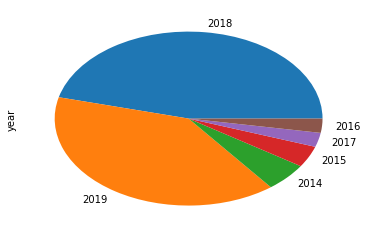

In [90]:
# Quick look at when were most programs updated
yearCounts.plot.pie()

In [103]:
#Now getting 10 most up to date programs
newest = df.sort_values(by='date', ascending=False)
newest = newest.drop('year', axis=1)
newest

,date,programName,type
54,2019-06-21,Nursing,Program
63,2019-06-19,Psychology,Profile
52,2019-06-19,New School,Special Area of Study
21,2019-06-19,English,General Education
50,2019-06-19,Multidisciplinary (Methods & Others),Discipline
35,2019-06-19,Industrial Design,Program
62,2019-06-19,Psychology,Discipline
7,2019-06-18,Chemistry,Discipline
66,2019-06-18,Radiation Oncology,Program
53,2019-06-18,North South Studies,Profile


## Dumping data into program stats

In [112]:
programStats = {
    
    'Total' : totalOffered,
    'Number of Programs' : numberPrograms,
    'Number of Profiles' : numberProfiles,
    'Number of Disciplines' : numberDisciplines,
    'Number of Special' : numberSpecial,
    'Number of General' : numberGeneral,
    'Year Counts' : yearCounts.to_json(),
    'Programs ordered newest' : newest.to_json()
    
}

with open('data/dawson_programs_stats.json', 'w') as f:
    json.dump(programStats, f)